# **Практическое задание #4**

1. Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - **1 балл**
2. Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - **2 балла**
3. Постройте график типа **boxplot** для столбца Age - **1 балл**
4. Проинтепретируйте полученный график - **1 балл**
5. Постройте график типа **pie chart** для переменных Survived, Pclass, подпишите доли в процентах - **1 балл**
6. Постройте график типа **pairplot** для всех числовых переменных датасета - **1 балл**
7. Постройте интерактивный **sunburst plot** (визуализация иерархических данных) с помощью **plotly**. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - **2 балла**
8. Снабдите все построенные графики наименованиями (title), подписями осей, легендами - **1 балл**

## Импортирование библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Зададим изначальный размер фигуры
sns.set(rc={'figure.figsize':(10,5)})

## 1. Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - **2 балла**



### **2.1 Survived**

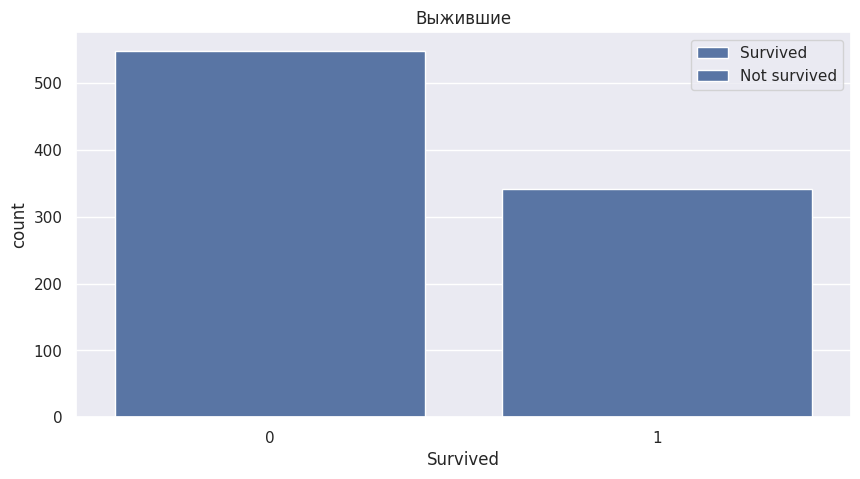

In [113]:
# С помощью seaborn.
ax = plt.subplot()
sns.countplot(x='Survived', data=df, label= ['Survived', 'Not survived'])
ax.set_title('Выжившие')
plt.show()

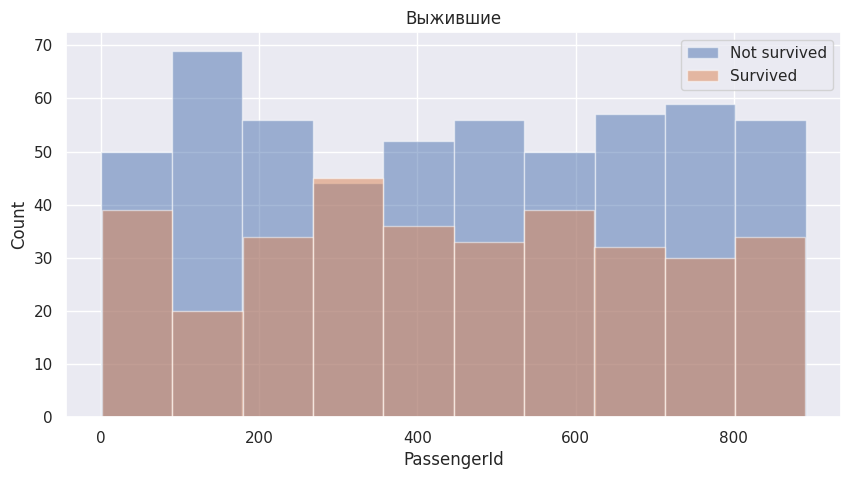

In [72]:
# Более информативный график matplotlib
fig, ax = plt.subplots()
ax.hist(df[df['Survived'] == 0]['PassengerId'], bins=10, alpha=0.5, label='Not survived')
ax.hist(df[df['Survived'] == 1]['PassengerId'], bins=10, alpha=0.5, label='Survived')
ax.set_xlabel('PassengerId')
ax.set_ylabel('Count')
ax.set_title('Выжившие')
ax.legend()
plt.show()

### **2.2 Pclass**

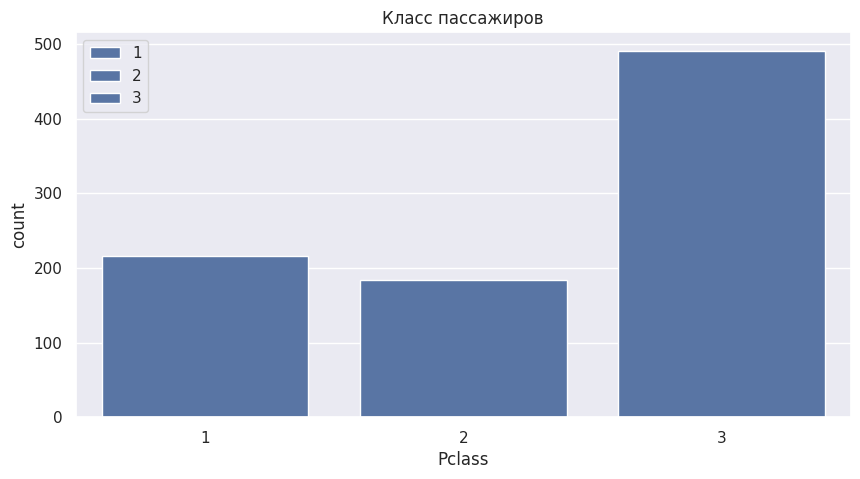

In [118]:
# С помощью seaborn
ax = plt.subplot()

sns.countplot(x='Pclass', data=df, label= [1,2,3])
ax.set_title('Класс пассажиров')
plt.legend()
plt.show()

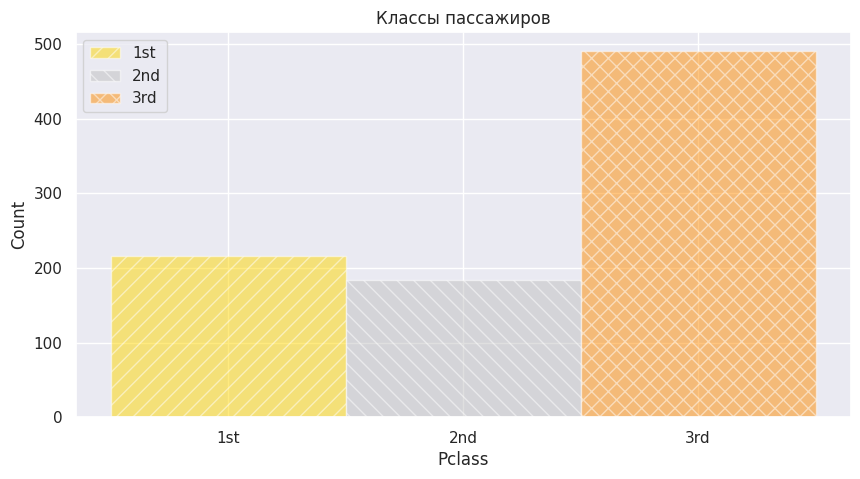

In [177]:
fig, ax = plt.subplots()
colors = ['gold', 'silver', 'darkorange']
ax.hist(df[df['Pclass'] == 1]['Pclass'], bins=[0.5, 1.5, 2.5, 3.5], alpha=0.5, label='1st', color='gold', hatch='//')
ax.hist(df[df['Pclass'] == 2]['Pclass'], bins=[0.5, 1.5, 2.5, 3.5], alpha=0.5, label='2nd', color='silver', hatch='\\\\')
ax.hist(df[df['Pclass'] == 3]['Pclass'], bins=[0.5, 1.5, 2.5, 3.5], alpha=0.5, label='3rd', color='darkorange', hatch='xx')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_title('Классы пассажиров')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['1st', '2nd', '3rd'])
ax.legend()
plt.show()

### **2.3 Age**

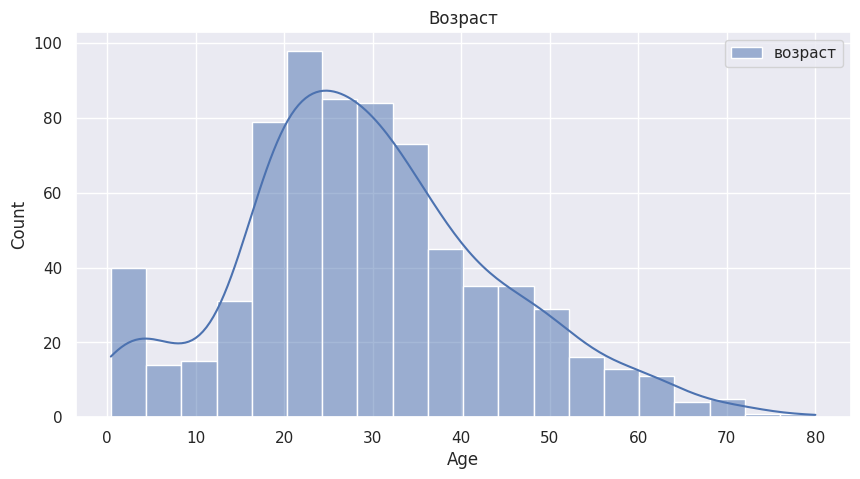

In [110]:
# С помощью seaborn.
ax = plt.subplot()
sns.histplot(x='Age', data=df, kde=True, label='Возраст')
ax.set_title('Возраст')
ax.legend()
plt.show()

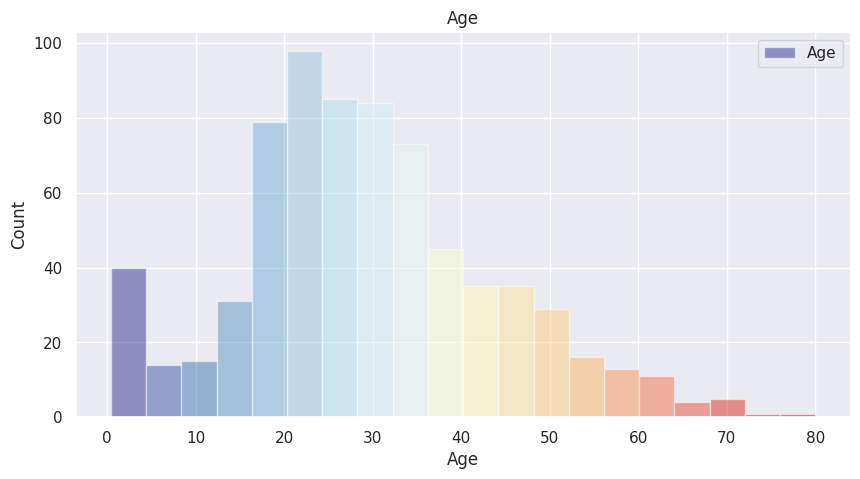

In [120]:
# С помощью matplotlib
ax = plt.subplot()
cm=plt.colormaps.get_cmap('RdYlBu_r')

n, bins, patches = ax.hist(df['Age'], bins=20, alpha=0.5, label='Age', color='red')
bin_centers = 0.2 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age')
ax.legend()
plt.show()

### **2.4 Sex**

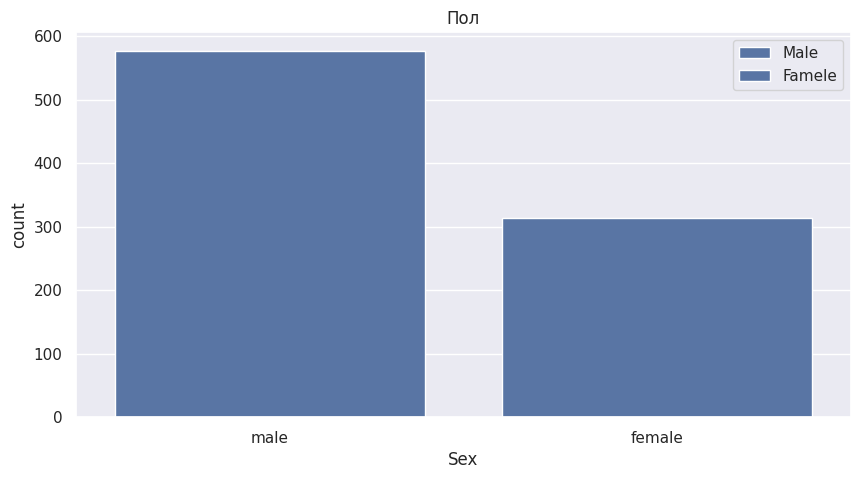

In [125]:
# С помощью seaborn
ax = plt.subplot()

sns.countplot(x='Sex', data=df, label= ['Male', 'Famele'])
ax.set_title('Пол')
plt.legend()
plt.show()


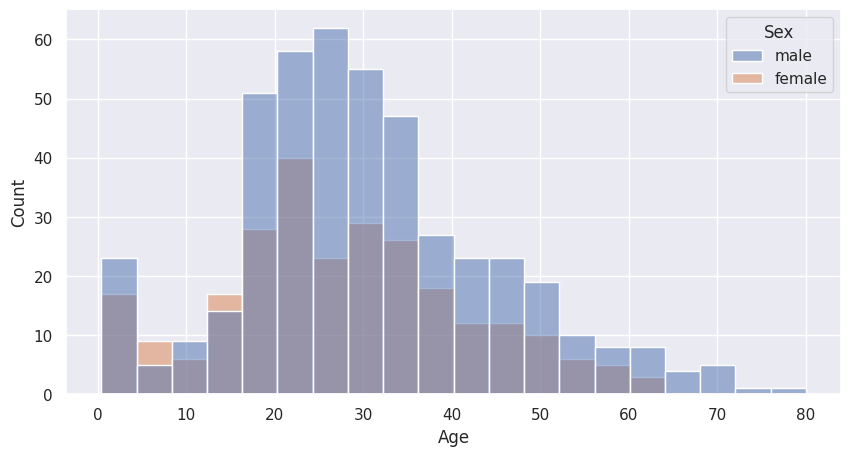

In [191]:
# С помощью seaborn
# Зависимость возраста от пола
sns.histplot(data=df, x='Age', hue='Sex')
plt.show()

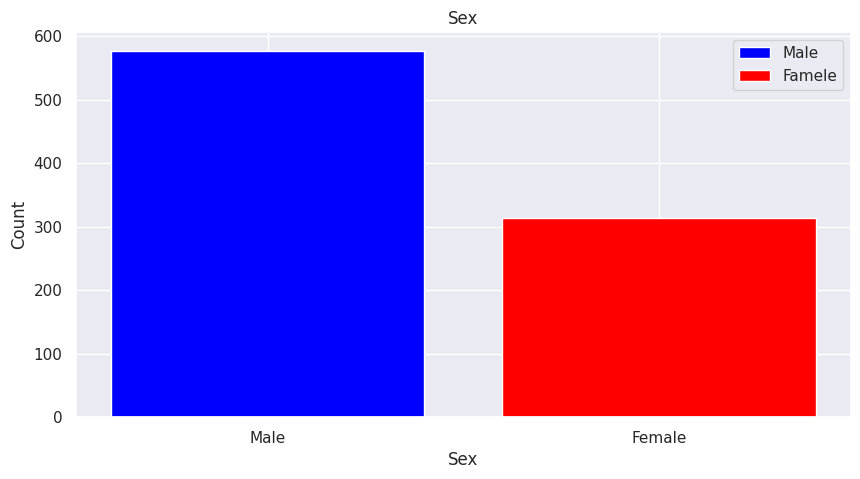

In [132]:
# С помощью matplotlib
fig, ax = plt.subplots()
colors = ['blue', 'red']  #red, green, blue, black, etc.
ax.bar(['Male', 'Female'], df['Sex'].value_counts(), color=colors, label= ['Male', 'Famele'])
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Sex')
plt.legend()
plt.show()

### **2.5 Parch** (количество родителей, детей (в том числе приемных) на борту)

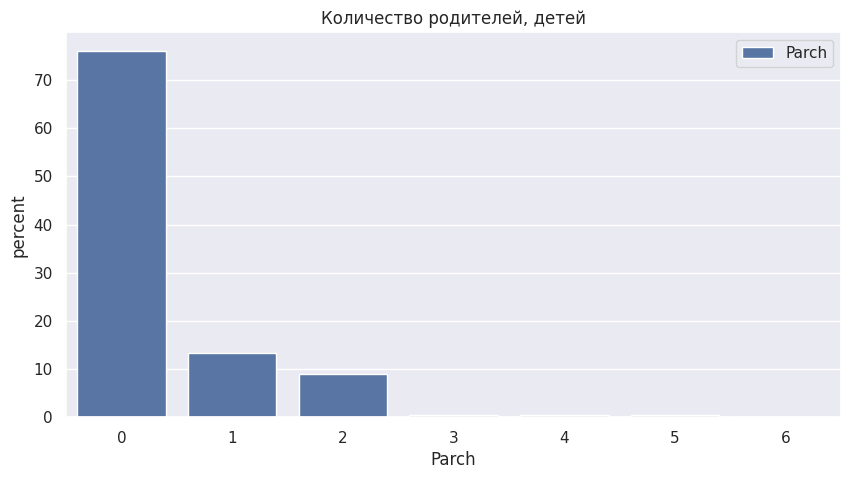

In [158]:
# С помощью seaborn
# Для наглядности на этом графике можно вывести в процентах.
ax = plt.subplot()
sns.countplot(x='Parch', data=df, label= 'Parch', stat="percent", dodge=False)
ax.set_title('Количество родителей, детей')
plt.legend()
plt.show()

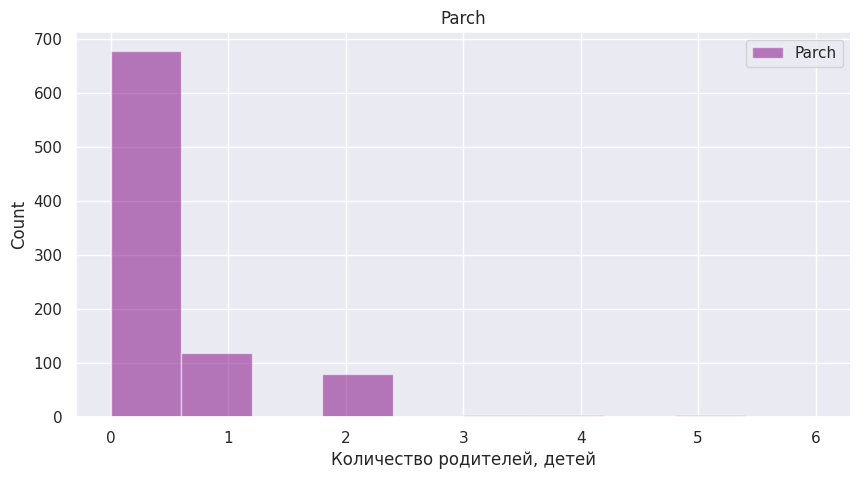

In [186]:
ax = plt.subplot()
plt.hist(df['Parch'], bins=10, alpha=0.5, label='Parch', color='purple')
ax.set_xlabel('Количество родителей, детей')
ax.set_ylabel('Count')
ax.set_title('Parch')
ax.legend()
plt.show()

### Можно для наглядности все графики вывести на одной полотне

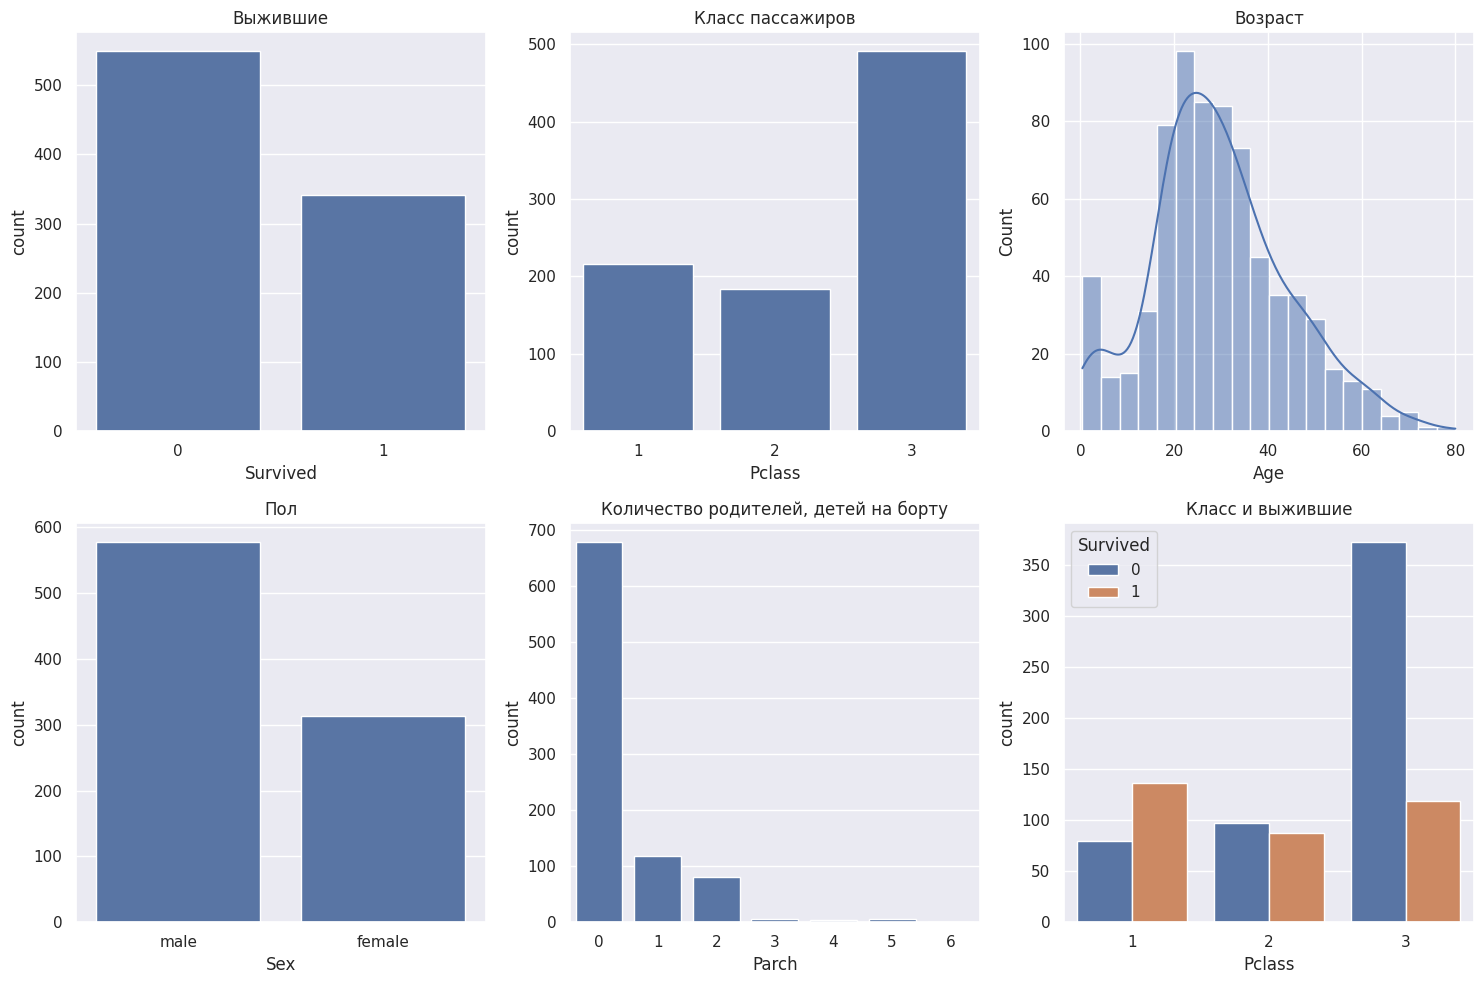

In [161]:
# 1. Визуализируем распределение значений признаков Survived, Pclass, Age, Sex, Parch
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x='Survived', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Выжившие')

sns.countplot(x='Pclass', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Класс пассажиров')

sns.histplot(x='Age', data=df, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Возраст')

sns.countplot(x='Sex', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Пол')

sns.countplot(x='Parch', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Количество родителей, детей на борту')

# Так же для понимания можно вывести на одном графике количество пассажиров в каждом классе
# и выживывших из данного класса.
sns.countplot(df, x="Pclass", hue="Survived", ax=axs[1, 2])
axs[1, 2].set_title('Класс и выжившие')

plt.tight_layout()
plt.show()

## 3. Постройте график типа **boxplot** для столбца Age - **1 балл**


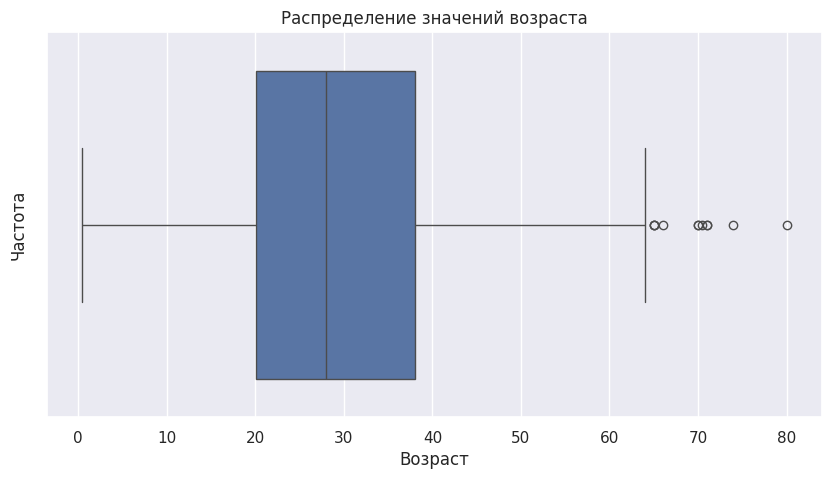

In [10]:
sns.boxplot(x='Age', data=df)

plt.title('Распределение значений возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

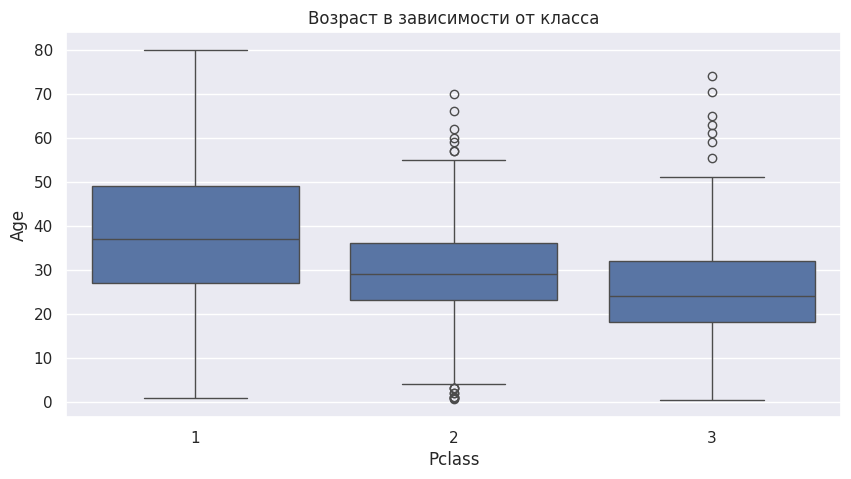

In [200]:
# Можно построить график зависимости возраста от класса пассажиров
ax = plt.subplot()
sns.boxplot(x='Pclass', y='Age', data=df)
ax.set_title('Возраст в зависимости от класса')
plt.show()

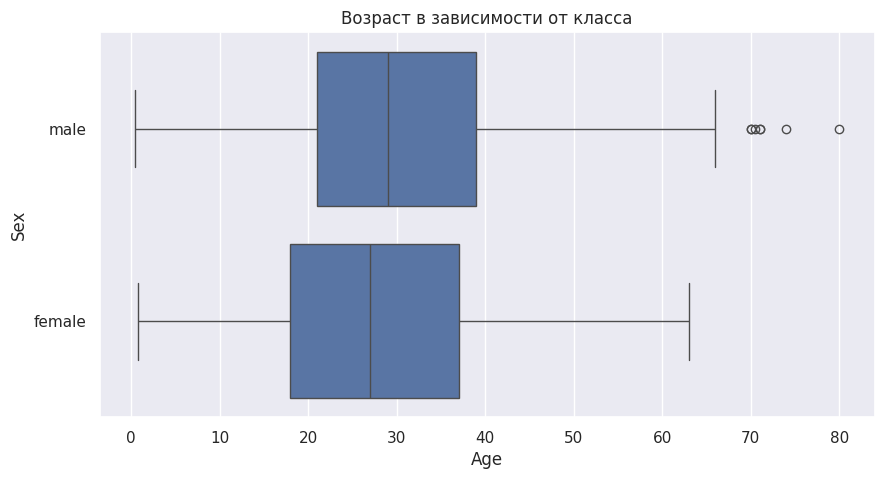

In [203]:
# Можно построить график зависимости возраста от пола
ax = plt.subplot()
sns.boxplot(x='Age', y='Sex', data=df)
ax.set_title('Возраст в зависимости от класса')
plt.show()

## 4. Проинтепретируйте полученный график - **1 балл**


- На графике видно, что возраст пассажиров варьируется в широких пределах во всех трех классах.

- В первом классе возраст пассажиров в среднем выше, чем во втором и третьем классах.

- Во втором классе есть несколько аномально молодых и пожилых пассажиров.

- Мужчин старшего возраста больше чем женщин.

## 5. Постройте график типа **pie chart** для переменных Survived, Pclass, подпишите доли в процентах - **1 балл**


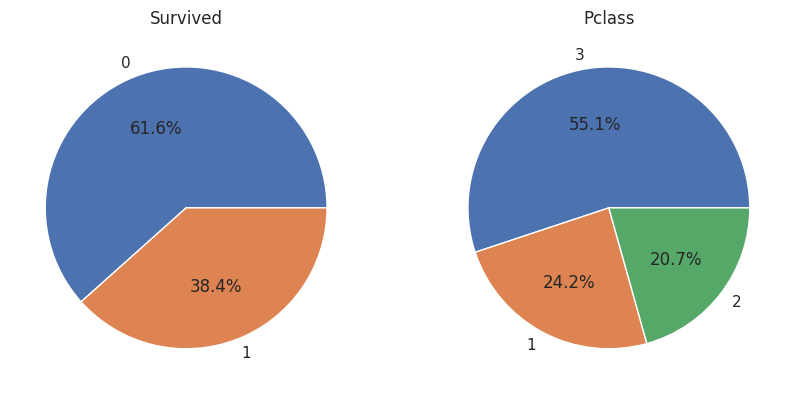

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')
axs[0].set_title('Survived')

axs[1].pie(df['Pclass'].value_counts(), labels=df['Pclass'].value_counts().index, autopct='%1.1f%%')
axs[1].set_title('Pclass')
plt.show()

## 6. Постройте график типа **pairplot** для всех числовых переменных датасета - **1 балл**


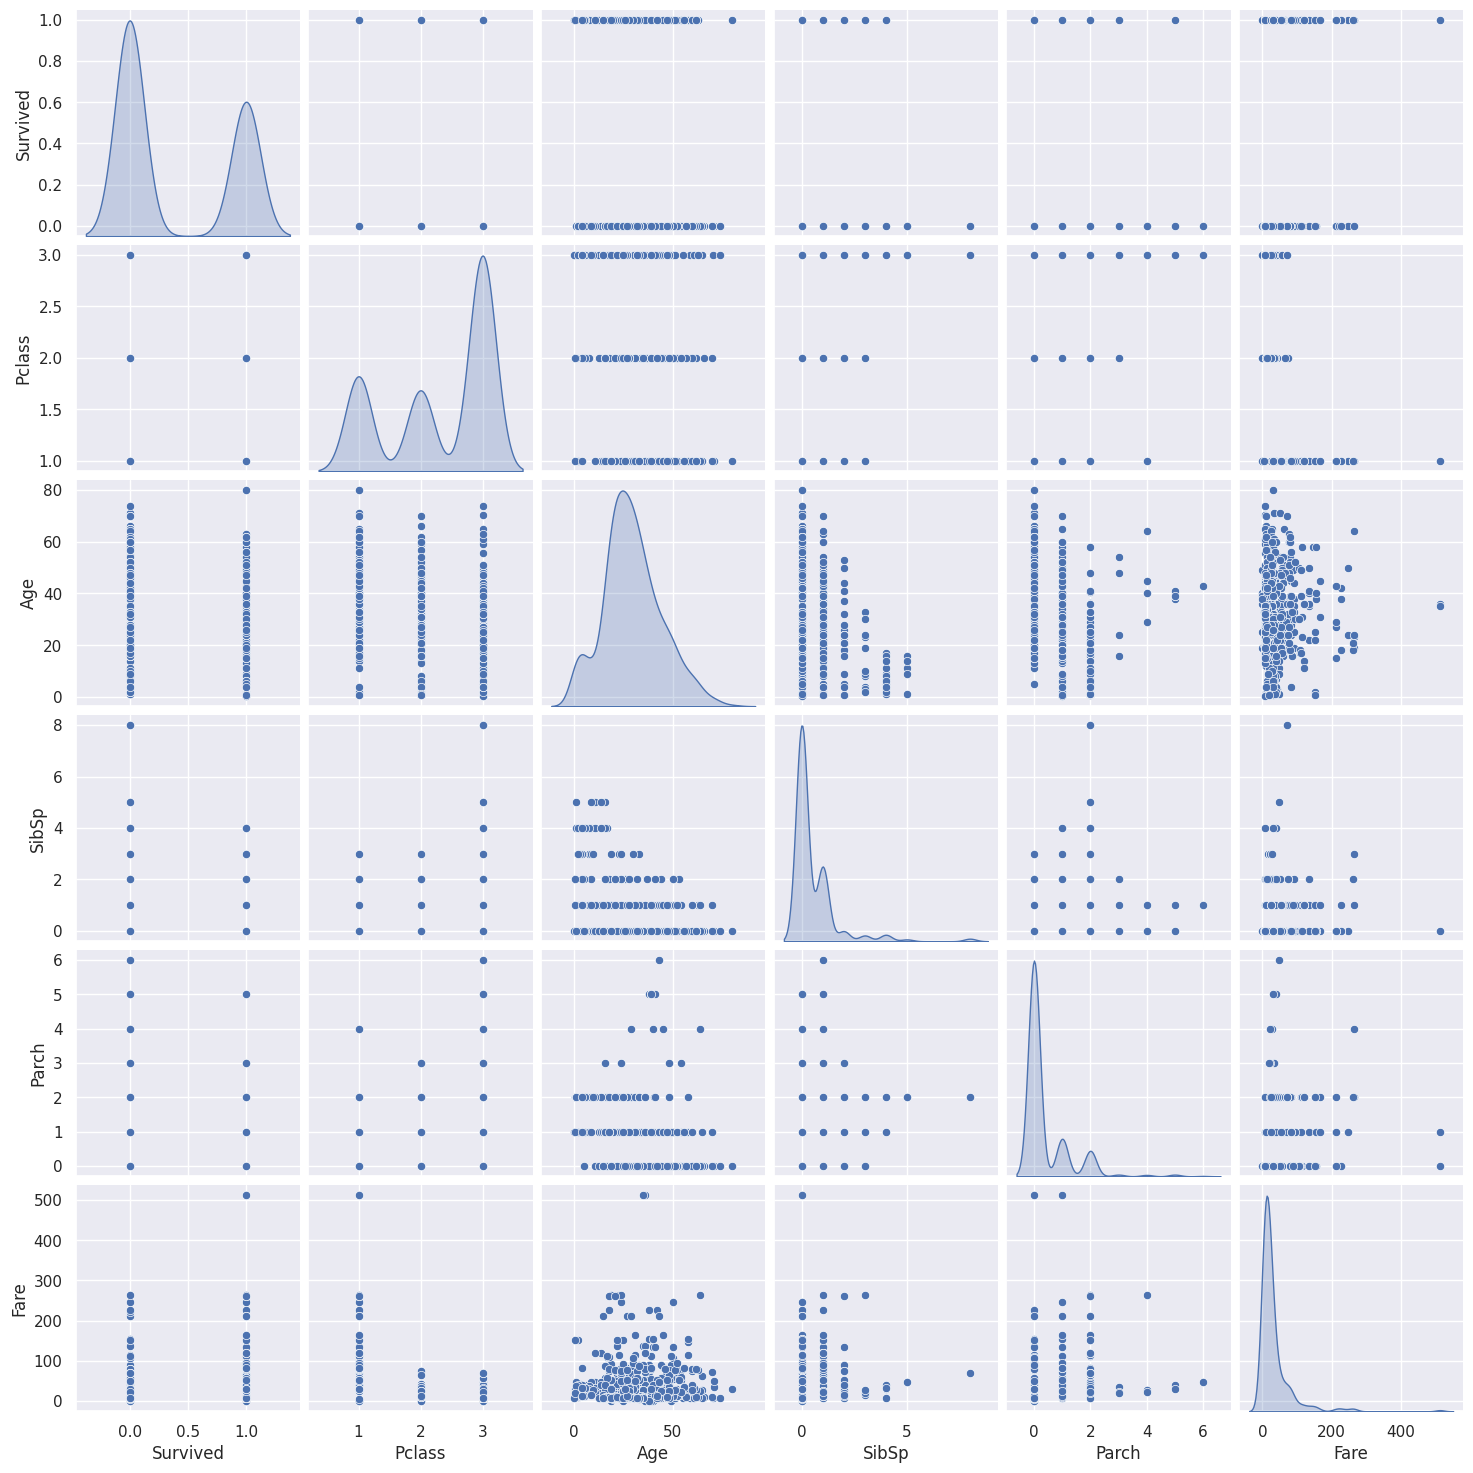

In [12]:
# 5. Построим график типа pairplot для всех числовых переменных датасета
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], diag_kind='kde')
plt.show()

## 7. Постройте интерактивный **sunburst plot** (визуализация иерархических данных) с помощью **plotly**. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - **2 балла**


In [15]:
# 6. Построим интерактивный sunburst plot с помощью plotly
fig = px.sunburst(
    df,
    path=['Pclass', 'Sex'],
    values='PassengerId',
    color='Sex',
    color_discrete_sequence=['#F6A6A6', '#A6F6CE'],
    title='Пассажиры "Титаника" по классам и полу'
)
fig.show()